In [8]:
import pandas as pd
import os
import json
import requests
import matplotlib.pyplot as plt
import plotly.express as ex

plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

### 폐건물과 주요 피쳐들간의 거리

In [1]:
# 발급 필요: free plan (1000건)
tmap_appkey = "TAMP API APPKEY"

In [3]:
# 자동차 경로
def driving_path(start, end, middle=None):
  # middle 경유지 최대 5개 까지 지원 (형식 X,Y, X,Y, X,Y, ...)
  url = "https://apis.openapi.sk.com/tmap/routes?version=1&callback=function"
  payload = {
      "startX": str(start.long),
      "startY": str(start.lat),
      "angle": 20,
      "speed": 30,
      "endPoiId": "10001",
      "endX": str(end.long),
      "endY": str(end.lat),
      "reqCoordType": "WGS84GEO",
      "startName": start.name,
      "endName": end.name,
      "searchOption": "2",  # 교통최적+최소시간
      "resCoordType": "WGS84GEO",
      "sort": "index",
      "lang": 0,
      "format": "json",
      "count": 10,
      "tollgateFareOption": 16,
      "roadType": 32,
      "directionOption": 1,
      "endRpFlag": "G",
      "gpsTime": "20191125153000",
      "uncetaintyP": 1,
      "uncetaintyA": 1,
      "uncetaintyAP": 1,
      "carType": 0,
      "gpsInfoList": "126.939376564495,37.470947057194365,120430,20,50,5,2,12,1_126.939376564495,37.470947057194365,120430,20,50,5,2,12,1",
      "detailPosFlag": "2"
  }

  if middle:
    payload['passList'] = '_'.join(middle)

  headers = {
      "accept": "application/json",
      "appKey": tmap_appkey,
      "content-type": "application/json"
  }

  response = requests.post(url, json=payload, headers=headers)

  tmp = json.loads(response.text)

  try:
    dist = tmp['features'][0]['properties']['totalDistance']
    time = tmp['features'][0]['properties']['totalTime']

    row = {'start':start.name, 'end':end.name, 'car_dist':dist, 'car_time':time}
  except:
    row = {'start':start.name, 'end':end.name, 'car_dist':None, 'car_time':None}

  return row

In [4]:
coor = pd.read_csv('./위경도.csv')

In [6]:
coor.grp.unique()

array(['빵소', '폐건물', '인프라', '산'], dtype=object)

In [7]:
transfer_df = pd.DataFrame()
for building in coor[coor['grp']=='폐건물'].itertuples():
    for pan in coor[coor['grp']=='빵소'].itertuples():
        row = driving_path(pan, building)
        transfer_df = pd.concat([transfer_df, pd.DataFrame([row])], ignore_index=True)

array([[<Axes: title={'center': '두정동 폐공사장'}>,
        <Axes: title={'center': '삼룡동 폐건물'}>],
       [<Axes: title={'center': '쌍용동 폐공장'}>, <Axes: >]], dtype=object)

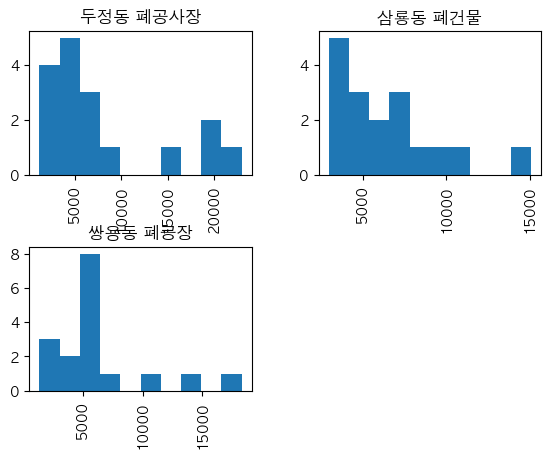

In [9]:
transfer_df.hist(by='end', column='car_dist')

array([[<Axes: title={'center': '두정동 폐공사장'}>,
        <Axes: title={'center': '삼룡동 폐건물'}>],
       [<Axes: title={'center': '쌍용동 폐공장'}>, <Axes: >]], dtype=object)

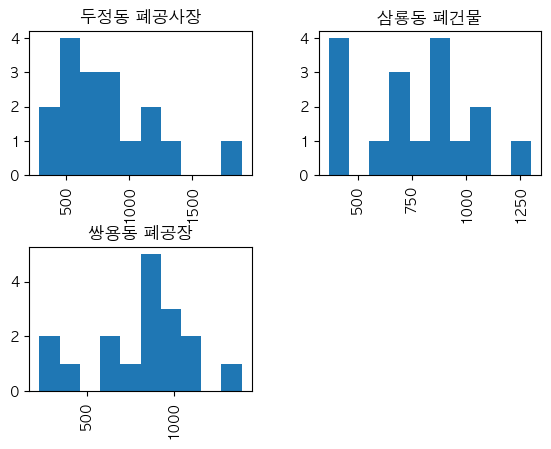

In [10]:
transfer_df.hist(by='end', column='car_time')

In [11]:
transfer_df.groupby('end').apply(pd.Series.describe).reset_index()\
    .pivot_table(columns='end', index='level_1', values='car_dist')\
        .drop(index='count').style.background_gradient(axis=1)

end,두정동 폐공사장,삼룡동 폐건물,쌍용동 폐공장
level_1,,,
25%,3525.000000,3893.000000,4355.000000
50%,5091.000000,5474.000000,5267.000000
75%,8435.000000,7273.000000,5644.000000
max,22965.000000,15080.000000,18337.000000
mean,7733.823529,6350.058824,6181.000000
min,1181.000000,2981.000000,1326.000000
std,6813.226019,3195.912477,4286.692708


In [12]:
transfer_df.groupby('end').apply(pd.Series.describe).reset_index()\
    .pivot_table(columns='end', index='level_1', values='car_time')\
        .drop(index='count').style.background_gradient(axis=1)

end,두정동 폐공사장,삼룡동 폐건물,쌍용동 폐공장
level_1,,,
25%,551.000000,574.000000,688.000000
50%,709.000000,746.000000,863.000000
75%,1003.000000,896.000000,1015.000000
max,1895.000000,1299.000000,1391.000000
mean,819.882353,760.117647,816.823529
min,285.000000,366.000000,229.000000
std,403.547841,267.387799,296.053043


In [13]:
infra_dist = pd.DataFrame()
for building in coor[coor['grp']=='폐건물'].itertuples():
    for infra in coor[coor['grp']=='인프라'].itertuples():
        row = driving_path(infra, building)
        infra_dist = pd.concat([infra_dist, pd.DataFrame([row])], ignore_index=True)

In [14]:
infra_dist.groupby('end').apply(pd.Series.describe).reset_index()\
    .pivot_table(columns='end', index='level_1', values='car_dist')\
        .drop(index='count').style.background_gradient(axis=1)

end,두정동 폐공사장,삼룡동 폐건물,쌍용동 폐공장
level_1,,,
25%,2964.500000,4557.000000,1447.750000
50%,3676.000000,4865.000000,3385.500000
75%,4807.500000,5528.500000,4624.250000
max,7118.000000,7431.000000,5757.000000
mean,4033.166667,5234.500000,3218.500000
min,1817.000000,4042.000000,944.000000
std,1867.340613,1209.285037,1997.848918


In [15]:
infra_dist.groupby('end').apply(pd.Series.describe).reset_index()\
    .pivot_table(columns='end', index='level_1', values='car_time')\
        .drop(index='count').style.background_gradient(axis=1)

end,두정동 폐공사장,삼룡동 폐건물,쌍용동 폐공장
level_1,,,
25%,564.000000,703.500000,316.250000
50%,708.000000,753.500000,591.500000
75%,765.000000,835.750000,890.750000
max,1035.000000,1076.000000,1036.000000
mean,702.666667,803.500000,610.333333
min,465.000000,688.000000,228.000000
std,202.701422,147.846880,346.883650


array([[<Axes: title={'center': '두정동 폐공사장'}>,
        <Axes: title={'center': '삼룡동 폐건물'}>],
       [<Axes: title={'center': '쌍용동 폐공장'}>, <Axes: >]], dtype=object)

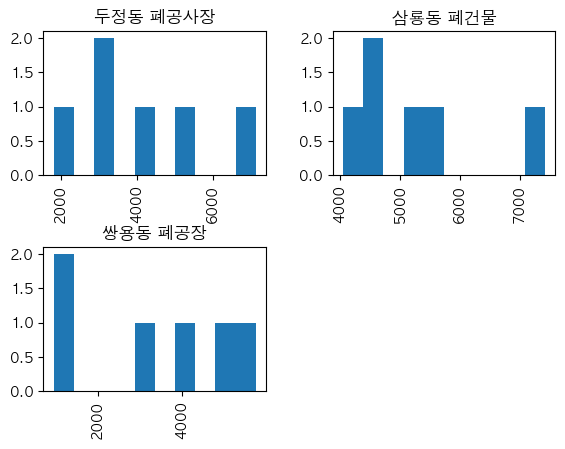

In [16]:
infra_dist.hist(by='end', column='car_dist')

array([[<Axes: title={'center': '두정동 폐공사장'}>,
        <Axes: title={'center': '삼룡동 폐건물'}>],
       [<Axes: title={'center': '쌍용동 폐공장'}>, <Axes: >]], dtype=object)

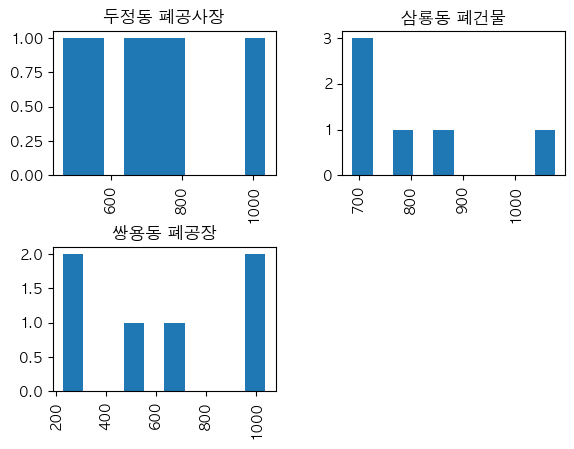

In [17]:
infra_dist.hist(by='end', column='car_time')

In [36]:
loc_df = infra_dist.pivot_table(index='end', columns='start', values='car_dist').reset_index().set_index('end')
loc_df

start,두정역,봉명역,쌍용역,천안고속버스터미널,천안아산역,천안역 1호선
end,,,,,,
두정동 폐공사장,1817.0,4146.0,5028.0,3206.0,7118.0,2884.0
삼룡동 폐건물,5675.0,4641.0,5089.0,4042.0,7431.0,4529.0
쌍용동 폐공장,5757.0,973.0,944.0,4866.0,3899.0,2872.0


In [ ]:
transfer_df = transfer_df.pivot_table(index='end', columns='start', values='car_dist').reset_index().set_index('end')

In [38]:
transfer_df

start,꼬망스케익,듀팡과자점,뚜쥬루돌가마점,못난이꽈배기,몽상가인,브레드보드,쁘띠빠리,수제빵연구소,슈에뜨베이커리,시바앙과자점,엘림제과,주식회사 호도원본점,지씨브레드,천안당호두과자남천안점,천안옛날호두과자본점,파스텔베이커리,할머니 학화호도과자 본점
end,,,,,,,,,,,,,,,,,
두정동 폐공사장,1181.0,1520.0,8435.0,6660.0,3775.0,18831.0,2282.0,3358.0,5760.0,4138.0,22965.0,5091.0,6053.0,15089.0,18970.0,3842.0,3525.0
삼룡동 폐건물,7273.0,6804.0,4808.0,2981.0,4994.0,10291.0,9848.0,8641.0,5474.0,3421.0,15080.0,4738.0,3227.0,7002.0,6189.0,3287.0,3893.0
쌍용동 폐공장,5267.0,4355.0,4004.0,2509.0,1326.0,13548.0,5256.0,5555.0,1329.0,4927.0,18337.0,6843.0,5644.0,10239.0,4977.0,5380.0,5581.0


In [39]:
loc_df = pd.concat([loc_df,transfer_df], axis=1)

In [40]:
loc_df.columns = list(map(lambda x: x+'_dist', loc_df.columns))

In [41]:
loc_df

,두정역_dist,봉명역_dist,쌍용역_dist,천안고속버스터미널_dist,천안아산역_dist,천안역 1호선_dist,꼬망스케익_dist,듀팡과자점_dist,뚜쥬루돌가마점_dist,못난이꽈배기_dist,...,수제빵연구소_dist,슈에뜨베이커리_dist,시바앙과자점_dist,엘림제과_dist,주식회사 호도원본점_dist,지씨브레드_dist,천안당호두과자남천안점_dist,천안옛날호두과자본점_dist,파스텔베이커리_dist,할머니 학화호도과자 본점_dist
end,,,,,,,,,,,,,,,,,,,,,
두정동 폐공사장,1817.0,4146.0,5028.0,3206.0,7118.0,2884.0,1181.0,1520.0,8435.0,6660.0,...,3358.0,5760.0,4138.0,22965.0,5091.0,6053.0,15089.0,18970.0,3842.0,3525.0
삼룡동 폐건물,5675.0,4641.0,5089.0,4042.0,7431.0,4529.0,7273.0,6804.0,4808.0,2981.0,...,8641.0,5474.0,3421.0,15080.0,4738.0,3227.0,7002.0,6189.0,3287.0,3893.0
쌍용동 폐공장,5757.0,973.0,944.0,4866.0,3899.0,2872.0,5267.0,4355.0,4004.0,2509.0,...,5555.0,1329.0,4927.0,18337.0,6843.0,5644.0,10239.0,4977.0,5380.0,5581.0


In [42]:
# 사전 조사한, 폐건물 주변 평가요소들의 개수
df = pd.read_excel('./지표 데이터 셋.xlsx')
df = df.set_index('index')

In [43]:
df

,버스 정류장,지하철역,주차장,주유소,음식점(2km),오락시설(2km),숙박시설(2km),편의시설(2km),관광시설(2km),관광시설(10km)
index,,,,,,,,,,
두정동 폐공사장,36,1,8,17,2081,14,49,150,1,15
쌍용동 폐공장,41,2,19,18,1334,11,62,64,0,16
삼룡동 폐건물,26,0,6,16,133,5,27,14,3,18


In [44]:
loc_df = pd.concat([loc_df, df], axis=1)
loc_df

,두정역_dist,봉명역_dist,쌍용역_dist,천안고속버스터미널_dist,천안아산역_dist,천안역 1호선_dist,꼬망스케익_dist,듀팡과자점_dist,뚜쥬루돌가마점_dist,못난이꽈배기_dist,...,버스 정류장,지하철역,주차장,주유소,음식점(2km),오락시설(2km),숙박시설(2km),편의시설(2km),관광시설(2km),관광시설(10km)
두정동 폐공사장,1817.0,4146.0,5028.0,3206.0,7118.0,2884.0,1181.0,1520.0,8435.0,6660.0,...,36,1,8,17,2081,14,49,150,1,15
삼룡동 폐건물,5675.0,4641.0,5089.0,4042.0,7431.0,4529.0,7273.0,6804.0,4808.0,2981.0,...,26,0,6,16,133,5,27,14,3,18
쌍용동 폐공장,5757.0,973.0,944.0,4866.0,3899.0,2872.0,5267.0,4355.0,4004.0,2509.0,...,41,2,19,18,1334,11,62,64,0,16


In [45]:
# 반경 내 공원시설 개수 추가
park = pd.read_csv('./충청남도_천안시_도시공원정보_위경도.csv', encoding='cp949')

In [46]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자'],
      dtype='object')

In [47]:
park_df = park[['공원명', '소재지지번주소', '위도', '경도']]

In [48]:
park_df.columns = ['name', 'addr', 'lat', 'long']

In [49]:
park_df['grp'] = 'park'

/var/folders/ky/h5cjl7dj2y9cj2mn9cv958kc0000gn/T/ipykernel_22684/2394804862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_df['grp'] = 'park'


In [50]:
park_df

,name,addr,lat,long,grp
0,용곡공원(용곡4),충청남도 천안시 동남구 용곡동 597,36.787417,127.135552,park
1,눈들공원(용곡1),충청남도 천안시 동남구 용곡동 601,36.792611,127.139216,park
2,원성소공원,충청남도 천안시 동남구 원성동 214-3,36.813415,127.159059,park
3,원성공원(원성2),충청남도 천안시 동남구 원성동 482-6,36.807880,127.163675,park
4,꽃재공원(원성4),충청남도 천안시 동남구 원성동 573-1,36.800851,127.161612,park
...,...,...,...,...,...
185,신부11공원,충청남도 천안시 동남구 신부동 989,36.817610,127.163627,park
186,안서2공원,충청남도 천안시 동남구 안서동 228-6,36.830366,127.179171,park
187,청수소공원,충청남도 천안시 동남구 구성동 533,36.795660,127.156478,park
188,성거1호소공원,충청남도 천안시 서북구 성거읍 오목리 235,36.893301,127.206801,park


In [51]:
transfer_df = pd.DataFrame()
for building in coor[coor['grp']=='폐건물'].itertuples():
    for park in park_df.itertuples():
        row = driving_path(park, building)
        transfer_df = pd.concat([transfer_df, pd.DataFrame([row])], ignore_index=True)

In [58]:
# 반경 2km 이내
transfer_df[transfer_df['car_dist'] <= 2000].groupby('end')['start'].count()

end
두정동 폐공사장    26
삼룡동 폐건물     12
쌍용동 폐공장     36
Name: start, dtype: int64

In [59]:
# 반경 10km 이내
transfer_df[transfer_df['car_dist'] <= 10000].groupby('end')['start'].count()

end
두정동 폐공사장    171
삼룡동 폐건물     115
쌍용동 폐공장     163
Name: start, dtype: int64

In [53]:
loc_df['공원 (2km)'] = transfer_df[transfer_df['car_dist'] <= 2000].groupby('end')['start'].count()
loc_df['공원 (10km)'] = transfer_df[transfer_df['car_dist'] <= 10000].groupby('end')['start'].count()

In [60]:
loc_df

,두정역_dist,봉명역_dist,쌍용역_dist,천안고속버스터미널_dist,천안아산역_dist,천안역 1호선_dist,꼬망스케익_dist,듀팡과자점_dist,뚜쥬루돌가마점_dist,못난이꽈배기_dist,...,주차장,주유소,음식점(2km),오락시설(2km),숙박시설(2km),편의시설(2km),관광시설(2km),관광시설(10km),공원 (2km),공원 (10km)
두정동 폐공사장,1817.0,4146.0,5028.0,3206.0,7118.0,2884.0,1181.0,1520.0,8435.0,6660.0,...,8,17,2081,14,49,150,1,15,26,171
삼룡동 폐건물,5675.0,4641.0,5089.0,4042.0,7431.0,4529.0,7273.0,6804.0,4808.0,2981.0,...,6,16,133,5,27,14,3,18,12,115
쌍용동 폐공장,5757.0,973.0,944.0,4866.0,3899.0,2872.0,5267.0,4355.0,4004.0,2509.0,...,19,18,1334,11,62,64,0,16,36,163


In [94]:
transfer_df = pd.DataFrame()
for building in coor[coor['grp']=='폐건물'].itertuples():
    for mountain in coor[coor['grp']=='산'].itertuples():
        row = driving_path(mountain, building)
        transfer_df = pd.concat([transfer_df, pd.DataFrame([row])], ignore_index=True)

In [ ]:
transfer_df.describe()

,car_dist,car_time,car_time_min
count,111.000000,111.000000,111.000000
mean,16960.027027,1457.081081,24.284685
std,8813.742401,658.255341,10.970922
min,674.000000,128.000000,2.133333
25%,9145.500000,1000.500000,16.675000
50%,18327.000000,1393.000000,23.216667
75%,22712.000000,1934.500000,32.241667
max,38028.000000,2926.000000,48.766667


In [62]:
transfer_df = transfer_df.assign(car_time_min=transfer_df.car_time / 60)

In [ ]:
transfer_df[transfer_df.car_time <= 10000]

,start,end,car_dist,car_time,car_time_min
0,매봉산1,두정동 폐공사장,23167,1879,31.316667
1,매봉산2,두정동 폐공사장,23321,1844,30.733333
2,매봉산3,두정동 폐공사장,21720,1651,27.516667
3,매봉산4,두정동 폐공사장,23744,1845,30.750000
4,매봉산5,두정동 폐공사장,22888,1753,29.216667
...,...,...,...,...,...
106,고려산2,삼룡동 폐건물,5460,625,10.416667
107,거머산1,삼룡동 폐건물,18745,1483,24.716667
108,거머산2,삼룡동 폐건물,18505,1463,24.383333
109,거머산3,삼룡동 폐건물,19279,1497,24.950000


In [413]:
loc_df['산 (2km)'] = transfer_df[transfer_df['car_dist'] <= 2000].groupby('end')['start'].count()
loc_df['산 (5km)'] = transfer_df[transfer_df['car_dist'] <= 5000].groupby('end')['start'].count()
loc_df['산 (10km)'] = transfer_df[transfer_df['car_dist'] <= 10000].groupby('end')['start'].count()

In [107]:
loc_df

,두정역_dist,봉명역_dist,쌍용역_dist,천안고속버스터미널_dist,천안아산역_dist,천안역 1호선_dist,꼬망스케익_dist,듀팡과자점_dist,뚜쥬루돌가마점_dist,못난이꽈배기_dist,...,오락시설(2km),숙박시설(2km),편의시설(2km),관광시설(2km),관광시설(10km),공원 (2km),공원 (10km),산 (2km),산 (5km),산 (10km)
두정동 폐공사장,1817.0,4146.0,5028.0,3206.0,7118.0,2884.0,1181.0,1520.0,8435.0,6660.0,...,14,49,150,1,15,26,171,1.0,3,8
삼룡동 폐건물,5675.0,4641.0,5089.0,4042.0,7431.0,4529.0,7273.0,6804.0,4808.0,2981.0,...,5,27,14,3,18,12,115,4.0,5,12
쌍용동 폐공장,5757.0,973.0,944.0,4866.0,3899.0,2872.0,5267.0,4355.0,4004.0,2509.0,...,11,62,64,0,16,36,163,0.0,4,10


In [419]:
transfer_df[transfer_df['car_dist'] <= 2000].groupby('end')['start'].count()

end
두정동 폐공사장    1
삼룡동 폐건물     4
Name: start, dtype: int64

In [421]:
loc_df = loc_df.fillna(0)

In [105]:
loc_df.to_csv('./features.csv')